# Case Study:  Candy Data Analysis
<mark>Problem:</mark> The purchasing department of a store wants to adapt a new type of candy into the sortiment and there are disagreement about the type it shall be (e.g. biscuit-based sweet, fruit-based sweet or maybe another type). Therefor a market research company has been commissioned and the result is available!

<mark>Given:</mark> A dataset candy-data.csv containing candy brands and their ingredients.

<mark>Goal:</mark> Analyze the data about candy characteristics and the impact on there popularity. A recommendation is needed at the end.

## Exploratory Data Analysis (EDA)


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import missingno as msno
import plotly.express as px
import plotly.io as pio

### Importing and inspecting data

In [ ]:
file_path = "/home/salah/data/candy-data.csv"
df = pd.read_csv(file_path)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   competitorname    85 non-null     object 
 1   chocolate         85 non-null     int64  
 2   fruity            85 non-null     int64  
 3   caramel           85 non-null     int64  
 4   peanutyalmondy    85 non-null     int64  
 5   nougat            85 non-null     int64  
 6   crispedricewafer  85 non-null     int64  
 7   hard              85 non-null     int64  
 8   bar               85 non-null     int64  
 9   pluribus          85 non-null     int64  
 10  sugarpercent      85 non-null     float64
 11  pricepercent      85 non-null     float64
 12  winpercent        85 non-null     float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.8+ KB


In [5]:
df.describe()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,0.435294,0.447059,0.164706,0.164706,0.082353,0.082353,0.176471,0.247059,0.517647,0.478647,0.468882,50.316764
std,0.498738,0.500140,0.373116,0.373116,0.276533,0.276533,0.383482,0.433861,0.502654,0.282778,0.285740,14.714357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011000,0.011000,22.445341
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220000,0.255000,39.141056
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.465000,0.465000,47.829754
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.732000,0.651000,59.863998
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988000,0.976000,84.180290


In [6]:
df.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [7]:
df.tail()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
80,Twizzlers,0,1,0,0,0,0,0,0,0,0.220,0.116,45.466282
81,Warheads,0,1,0,0,0,0,1,0,0,0.093,0.116,39.011898
82,Welch's Fruit Snacks,0,1,0,0,0,0,0,0,1,0.313,0.313,44.375519
83,Werther's Original Caramel,0,0,1,0,0,0,1,0,0,0.186,0.267,41.904308
84,Whoppers,1,0,0,0,0,1,0,0,1,0.872,0.848,49.524113


In [8]:
df.columns

Index(['competitorname', 'chocolate', 'fruity', 'caramel', 'peanutyalmondy',
       'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent',
       'pricepercent', 'winpercent'],
      dtype='object')

Attributes
|Header     |   Description |
|-----------|---------------|
|competitorname| product name|
|chocolate  |     Does it contain chocolate?|
|fruity      |    Is it fruit flavored?|
|caramel     |    Is there caramel in the candy?|
|peanutalmondy |	 Does it contain peanuts, peanut butter or almonds?|
|nougat     	| Does it contain nougat?|
|crispedricewafer| Does it contain crisped rice, wafers, or a cooki component?|
|hard        |	 Is it a hard candy?|
|bar        | 	 Is it a candy bar?|
|pluribus   | 	 Is it one of many candies in a bag or box?|
|sugarpercent| 	 The percentile of sugar it falls under within the data set.|
|pricepercent| 	 The unit price percentile compared to the rest of the set.|
|winpercent  |	 The overall win percentage according to 269,000 matchups.|

|Entry|Meaning|
|-----|-------|
|1    | yes   |
|0    | no    |

Notes:

sugarpercent and pricepercent is relativ to other in the dataset and has the range [0,1]

winprecent is in percent, but not normalized and has range [0,100]

In [9]:
missing_values = df.isnull().sum()
print(missing_values)
if missing_values.sum() == 0:
    print("-- No missing values --")
else:
    print("-- Missing values found --")
    print(missing_values[missing_values > 0])

competitorname      0
chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercent        0
pricepercent        0
winpercent          0
dtype: int64
-- No missing values --


<function matplotlib.pyplot.show(close=None, block=None)>

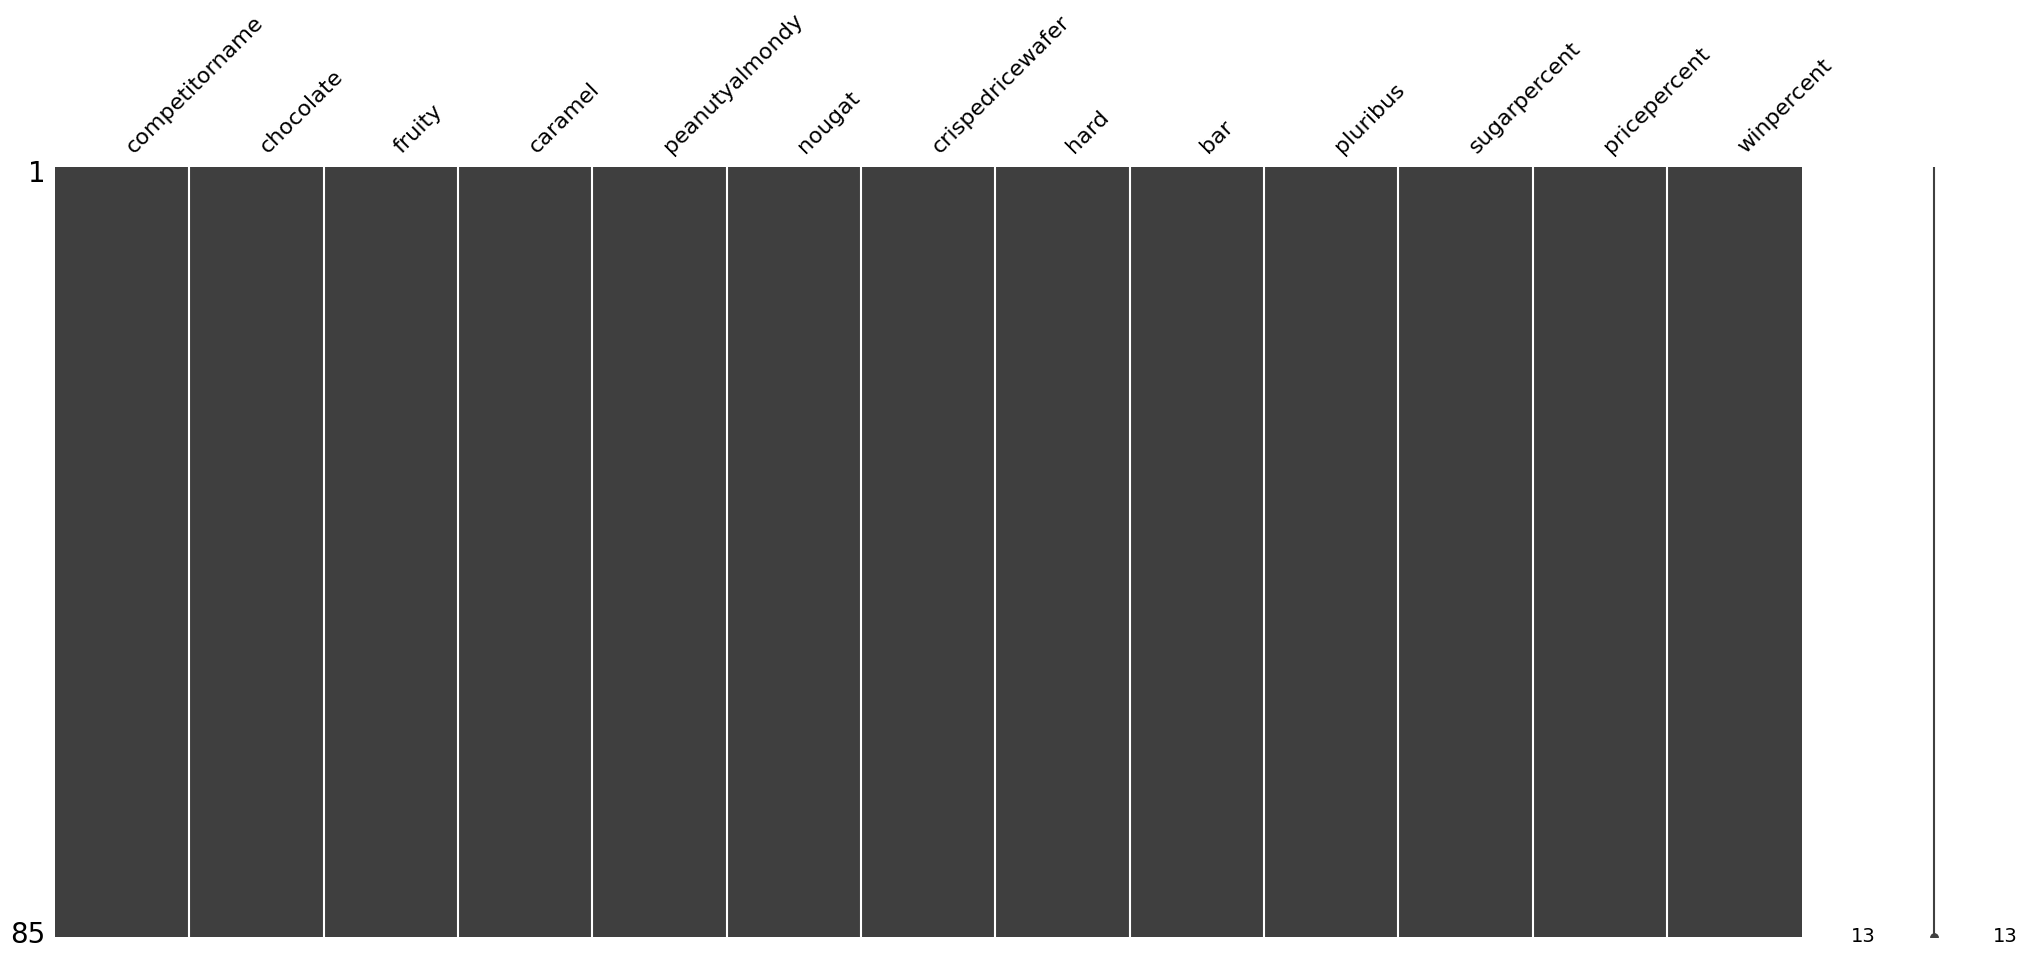

In [10]:
msno.matrix(df)
plt.show

In [11]:
duplicated_rows = df.duplicated().sum()
if duplicated_rows.sum() == 0:
    print(duplicated_rows)
    print("-- No duplicated row --")
else:
    print("-- Duplicated row found")
    print(duplicated_rows[duplicated_rows > 0])
    df[df.duplicated()]

0
-- No duplicated row --


In [12]:
max_values = df.drop(columns = ["competitorname"]).max()
min_values = df.drop(columns=["competitorname"]).min()
print("Maximum value per column:\n", max_values)
print("----------------------------")
print("Minimum value per column:\n", min_values)

Maximum value per column:
 chocolate            1.00000
fruity               1.00000
caramel              1.00000
peanutyalmondy       1.00000
nougat               1.00000
crispedricewafer     1.00000
hard                 1.00000
bar                  1.00000
pluribus             1.00000
sugarpercent         0.98800
pricepercent         0.97600
winpercent          84.18029
dtype: float64
----------------------------
Minimum value per column:
 chocolate            0.000000
fruity               0.000000
caramel              0.000000
peanutyalmondy       0.000000
nougat               0.000000
crispedricewafer     0.000000
hard                 0.000000
bar                  0.000000
pluribus             0.000000
sugarpercent         0.011000
pricepercent         0.011000
winpercent          22.445341
dtype: float64


### Data Cleaning
Data is clean! Yuhu

### Transformation of sugar and price

In [13]:
import os

Plots for reasonable estimation of price and sugar

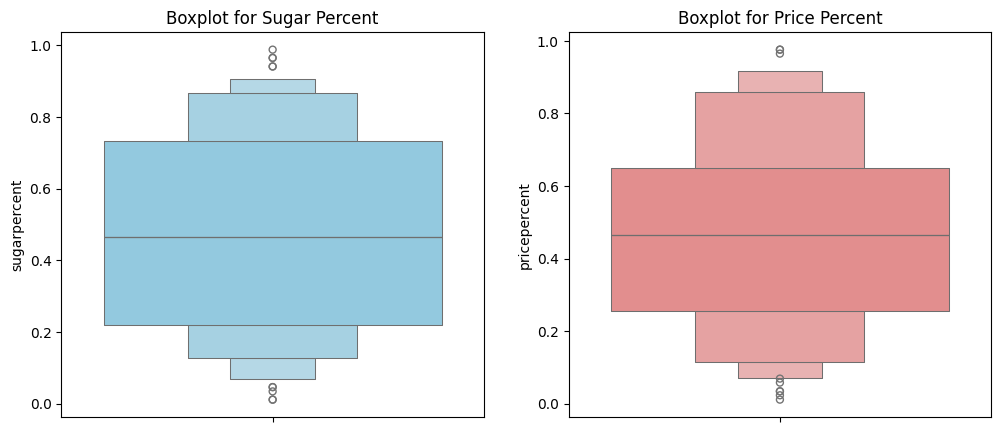

In [ ]:
plt.figure(figsize=(12,5))
#sugar
plt.subplot(1,2,1)
sns.boxenplot(y=df["sugarpercent"], 
              color="skyblue")
plt.title("Boxplot for Sugar Percent")
#price
plt.subplot(1,2,2)
sns.boxenplot(y=df["pricepercent"], 
              color="lightcoral")
plt.title("Boxplot for Price Percent")
path_folder = "/home/salah//plots"
if not os.path.exists(path_folder):
    os.makedirs(path_folder)
file_name = os.path.join(path_folder, "Boxplots_of_sugarpercent_and_pricepercent.png")
plt.savefig(file_name, bbox_inches="tight")
plt.show()


1) **sugarpercent**:
- The median is around ~0.5. So the avarage candy is in the 50th percentile of sugar content and falls in the IQR (~0.25 - ~0.75).
- Some outliers indicating candies have higher sugar or lower sugar in relative to other.
2) **pricepercent**:
- Similar to the sugarpercent, but the quantiles are wider, wich can mean, that the price higher variation

**Assumptions 1:** Sugar
- Using a range of [5,70] in gram for sugar for 100g portion size using basic linear transformation:
$$ 
y=mx+b 
$$

In [15]:
sugar_min = 5
sugar_max = 70
df["sugar_absolute"] = df["sugarpercent"] * (sugar_max - sugar_min) + sugar_min
df.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,sugar_absolute
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,52.579999
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936,44.259998
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086,5.715000
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505,5.715000
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465,63.890001


Example: 100 Grand has according to sugarpercent 0.732 more sugar then the rest of the candies. 

**Assumption 2:** Price
- According to statsics, the mean price of a candy in US is about 2.27$.
$$
UpperBound = μ + 1.50
$$
$$
LowerBound = μ - 1.50
$$ 
where LowerBound >= 0.10 

In [16]:
price_mean = 2.27
price_min = max(0.10, price_mean -1.50)
price_max = price_mean + 1.50
print(f"Lower bound = {price_min}$\nMean = {price_mean}$\nUpper bound = {price_max}$")

df["price_absolute"] = df["pricepercent"] * (price_max - price_min) * price_min
df.head()

Lower bound = 0.77$
Mean = 2.27$
Upper bound = 3.77$


,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,sugar_absolute,price_absolute
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,52.579999,1.98660
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936,44.259998,1.18041
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086,5.715000,0.26796
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505,5.715000,1.18041
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465,63.890001,1.18041


In [17]:
# Unique competetors
unique_products = df["competitorname"].nunique()
print(f"Number of Unique Products: {unique_products}")

Number of Unique Products: 85


In [18]:
ingredient_attributes = [
    "chocolate", 
    "caramel", 
    "peanutyalmondy", 
    "nougat", 
    "crispedricewafer", 
    "hard", 
    "bar", 
    "pluribus"
]
# Unique combis
unique_combinations = df[ingredient_attributes].drop_duplicates().shape[0]
print(f"Number of Unique Combinations: {unique_combinations}")

Number of Unique Combinations: 25


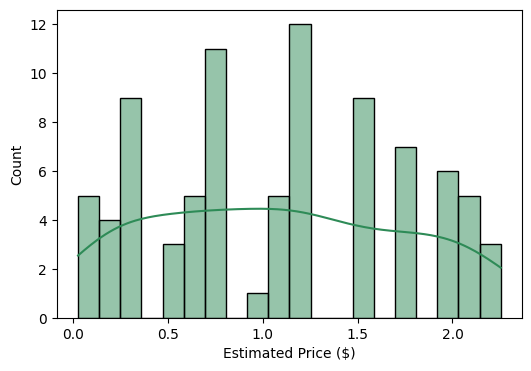

In [19]:
plt.figure(figsize=(6,4))
sns.histplot(df["price_absolute"],
             bins = 20,
             kde=True, 
             color="seagreen")
plt.xlabel("Estimated Price ($)")
file_name = os.path.join(path_folder, "Distribution_Of_Absolute_Price.png")
plt.savefig(file_name, bbox_inches="tight")
plt.show()

These transformations are not meant to be exact but rather to provide a better understanding of the data making it easier to interpret, visualize and draw insights later!

### Visualization of Data Relationship

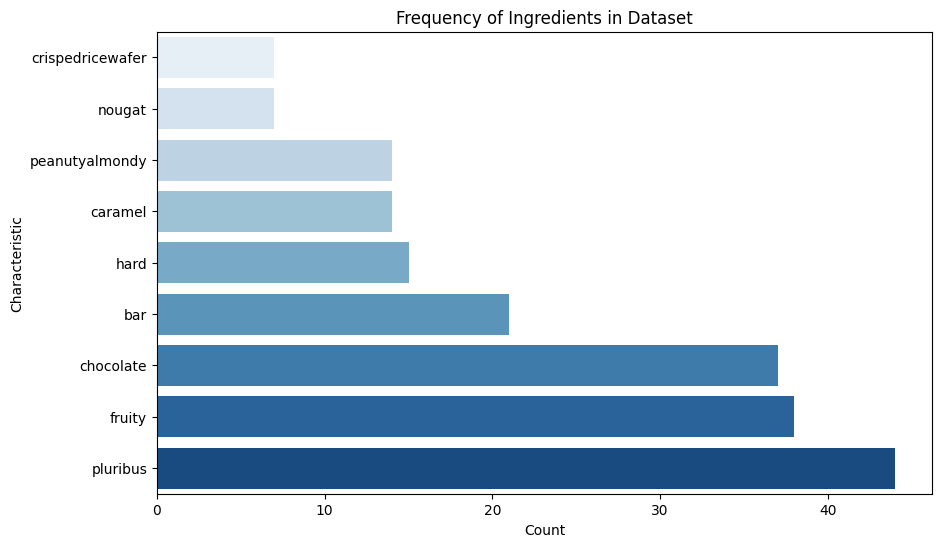

In [20]:
ingredient_attr = ["chocolate","fruity", "caramel", "peanutyalmondy", "nougat", "crispedricewafer", "hard", "bar", "pluribus"]
counts = df[ingredient_attr].sum().sort_values()

plt.figure(figsize=(10,6))
sns.barplot(x=counts.values, y=counts.index,hue=counts.index, palette="Blues")
plt.title("Frequency of Ingredients in Dataset")
plt.xlabel("Count")
plt.ylabel("Characteristic")
file_name = os.path.join(path_folder, "Frequency")
plt.savefig(file_name, dpi=300, bbox_inches="tight", pad_inches=0.2)
plt.show()

In [ ]:
chocolate_means = df.groupby("chocolate")["winpercent"].mean().reset_index()
chocolate_means["chocolate"] = chocolate_means["chocolate"].map({0: "Without Chocolate", 1: "With Chocolate"})

fig = px.bar(chocolate_means, x="chocolate", y="winpercent", 
             title="Impact of Chocolate on Popularity",
             text=chocolate_means["winpercent"].round(1), 
             color="chocolate", color_discrete_sequence=["lightblue", "darkblue"])

fig.update_traces(textposition="outside")
fig.update_layout(yaxis_title="Average Winpercent", xaxis_title="Chocolate Presence", width= 800, height=500)
fig.write_image("/home/salah/plots/Chocolate_impact.png", width=900, height=500)
fig.show()


In [ ]:
bar_means = df.groupby("bar")["winpercent"].mean().reset_index()
bar_means["bar"] = bar_means["bar"].map({0: "Not Bar", 1:"Bar"})
print(bar_means)

fig1 = px.bar(bar_means, x="bar", y="winpercent",
              title="Impact of Bar Form on Popularity",
              text=bar_means["winpercent"].round(1),
              color="bar", color_discrete_sequence=["lightblue", "darkblue"])

fig1.update_traces(textposition= "outside")
fig1.update_layout(yaxis_title="Average Winpercent", xaxis_title= "Bar Pesence", width=800, height=500)
fig1.write_image("/home/salah/plots/Bar_impact.png", width=900, height=500)
fig1.show()

       bar  winpercent
0  Not Bar   46.714395
1      Bar   61.295413


In [ ]:
caramel_means = df.groupby("caramel")["winpercent"].mean().reset_index()
caramel_means["caramel"] = caramel_means["caramel"].map({0: "Without Caramel", 1:"With Caramel"})
print(bar_means)

fig2 = px.bar(caramel_means, x="caramel", y="winpercent",
              title="Impact of Caramel on Popularity",
              text=caramel_means["winpercent"].round(1),
              color="caramel", color_discrete_sequence=["lightblue", "darkblue"])

fig2.update_traces(textposition= "outside")
fig2.update_layout(yaxis_title="Average Winpercent", xaxis_title= "Caramel Pesence", width=800, height=500)
fig2.write_image("/home/salah/plots/Caramel_impact.png", width=900, height=500)
fig2.show()

       bar  winpercent
0  Not Bar   46.714395
1      Bar   61.295413


In [ ]:
peanutyalmondy_means = df.groupby("peanutyalmondy")["winpercent"].mean().reset_index()
peanutyalmondy_means["peanutyalmondy"] = peanutyalmondy_means["peanutyalmondy"].map({0: "Without Peanutyalmondy", 1:"With Peanutyalmondy"})
print(bar_means)

fig3 = px.bar(peanutyalmondy_means, x="peanutyalmondy", y="winpercent",
              title="Impact of Peanutyalmondy on Popularity",
              text=peanutyalmondy_means["winpercent"].round(1),
              color="peanutyalmondy", color_discrete_sequence=["lightblue", "darkblue"])

fig3.update_traces(textposition= "outside")
fig3.update_layout(yaxis_title="Average Winpercent", xaxis_title= "Peanutyalmondy Pesence", width=800, height=500)
fig3.write_image("/home/salah/plots/Peanutyalmondy.png", width=900, height=500)
fig3.show()

       bar  winpercent
0  Not Bar   46.714395
1      Bar   61.295413


#### Correlation Matrix

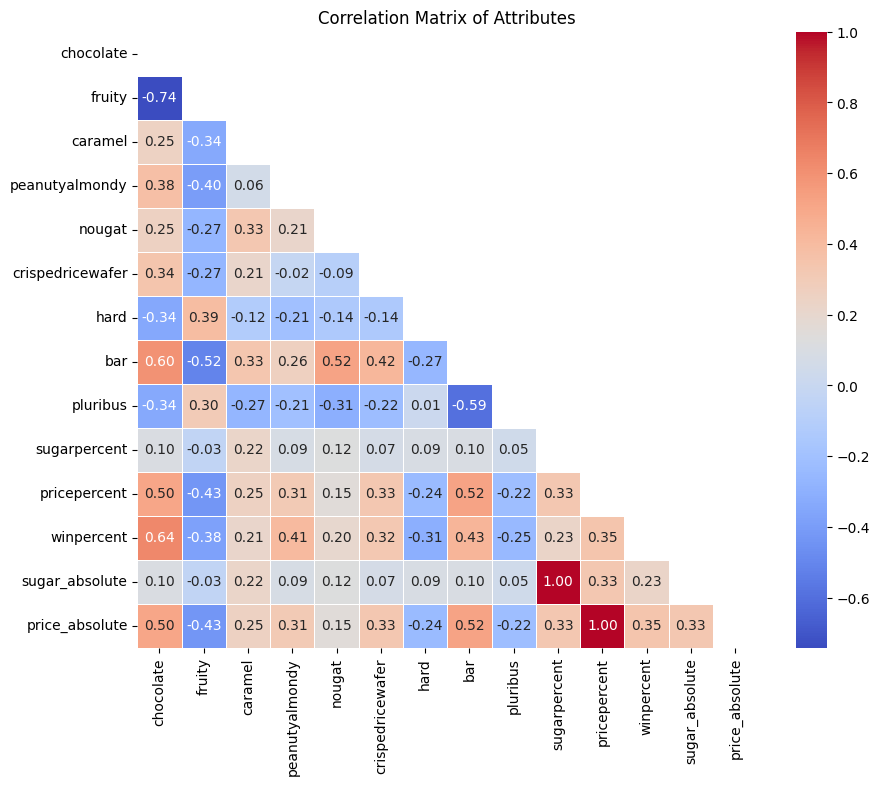

In [25]:
corr_matrix = df.select_dtypes(include=["number"]).corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,
            mask=mask,
            annot=True,
            cmap="coolwarm",
            fmt=".2f", 
            linewidths=0.5)
plt.title("Correlation Matrix of Attributes")
file_name = os.path.join(path_folder, "Correaltion_Matrix")
plt.savefig(file_name, dpi=300, bbox_inches="tight", pad_inches=0.2)
plt.show()

The above correlation matrix provides an intial overview of how different attributes are associated with winpercent. However correlation alone does not imply causation. To gain deeper understandig, statiscal test will be conducted to measure the actual effect on winprice.

Violinplot and Boxplots

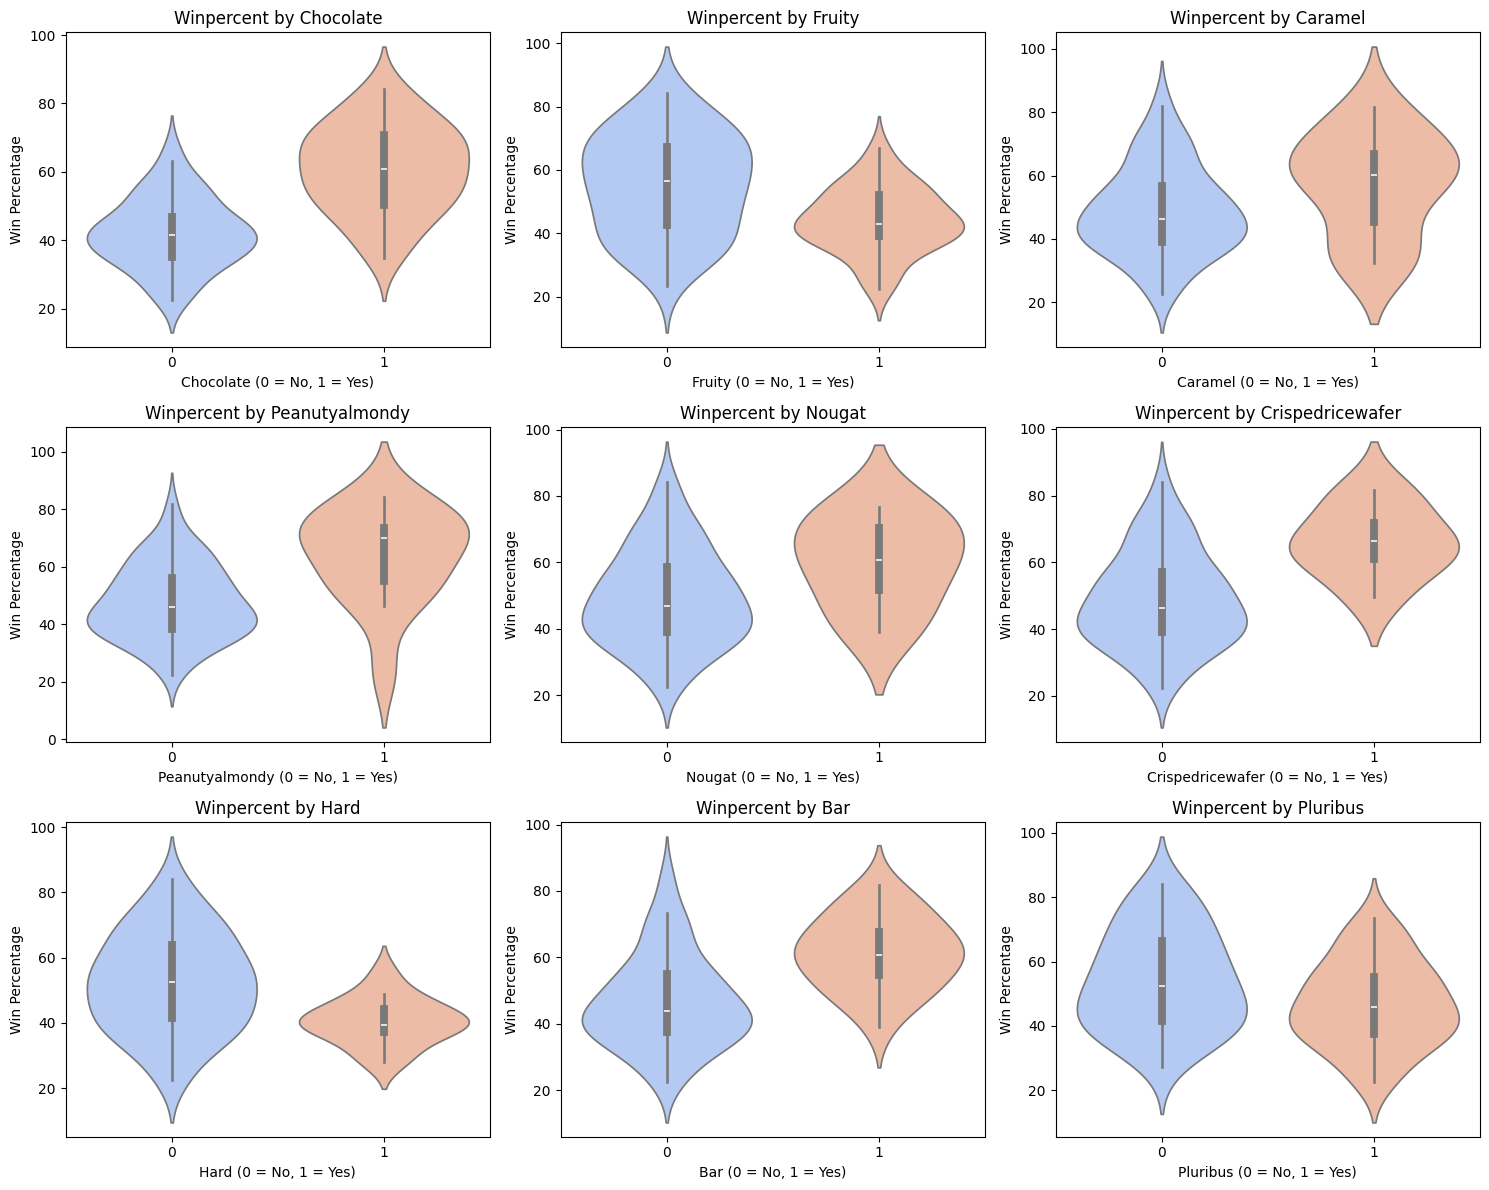

In [27]:
binary_attributes = ["chocolate", "fruity", "caramel", "peanutyalmondy", "nougat", 
                     "crispedricewafer", "hard", "bar", "pluribus"]
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,12))
axes = axes.flatten()

for i, attribute in enumerate(binary_attributes):
    sns.violinplot(data=df,x=attribute, y=df["winpercent"], ax= axes[i] ,hue= attribute, legend=False, palette="coolwarm",inner="box")
    axes[i].set_title(f"Winpercent by {attribute.capitalize()}")
    axes[i].set_xlabel(f"{attribute.capitalize()} (0 = No, 1 = Yes)")
    axes[i].set_ylabel("Win Percentage")
plt.tight_layout()
file_name = os.path.join(path_folder, "Violinplot_By_Winpercent.png")
plt.savefig(file_name, bbox_inches="tight")
plt.show()

Interpretation of above Violineplot

- **Chocolate**: Candiese with chocolate have higher win percanteage against candies without, which can be seen by the gap of the medians.

- **Fruity**: Non-fruity candy tend to be more popular then fruity.

- **Caramel, Peanut and Nougat**: Canides containing those ingredients tend to have more higer win percantages so they are more popular then those without.

- **Crispedrise**: No significant impact on win percantag.

- **Hard**: Non-hard candy are preferred aand more popular then hard candies.

- **Bar**: It has positive impact on popularity.

- **Plutibus**: Mult-pieces candies are less popular then singel-unit candies.


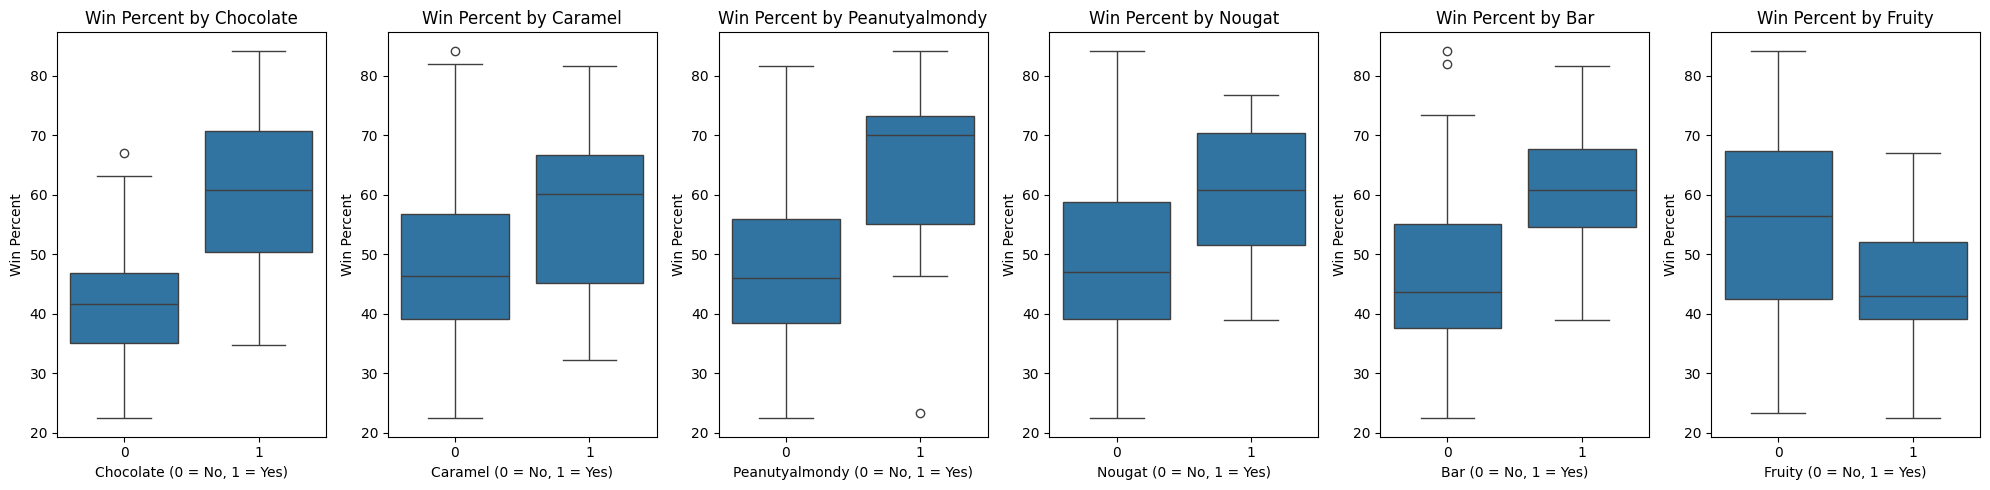

In [28]:
interesting_attributes = ["chocolate", "caramel", "peanutyalmondy", "nougat", "bar", "fruity"]
fig, axes = plt.subplots(nrows=1, ncols=len(interesting_attributes), figsize=(20,5))
axes = axes.flatten()

for i, attribute1 in enumerate(interesting_attributes):
    sns.boxplot(x=df[attribute1], y=df["winpercent"], ax=axes[i])
    axes[i].set_title(f"Win Percent by {attribute1.capitalize()}")
    axes[i].set_xlabel(f"{attribute1.capitalize()} (0 = No, 1 = Yes)")
    axes[i].set_ylabel("Win Percent")
plt.tight_layout()
file_name = os.path.join(path_folder, "Boxplots_Relevent_Attributes.png")
plt.savefig(file_name, bbox_inches="tight")
plt.show()

## Regression Analysis

In the following section I want to use a multiple regression to see which impact each column has on the winpercent, since we are having one dependent variable (winpercent) and multiple 
independet variables (e.g. chocolate, caramel, bar, ...).

### Multiple linear regression:



#### Formula
$$
y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_n X_n + \epsilon
$$

Where:

- **y** = Predicted **winpercent**
- **$\beta_0$** = Intercept (baseline when all features are 0)
- **$\beta_1 X_1$** = Effect of the first feature X_1 on y
- **$\beta_n X_n$** = Effect of the last feature X_n on y
- **$\dots$** = Additional features
- **$\epsilon$** = Model error

In [29]:
import statsmodels.api as sm

In [30]:
X = df[["chocolate", "fruity", "caramel", "peanutyalmondy","nougat", "crispedricewafer","hard", "bar","pluribus"]]
y = df["winpercent"]

X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             winpercent   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     8.842
Date:                Tue, 11 Mar 2025   Prob (F-statistic):           6.05e-09
Time:                        11:47:53   Log-Likelihood:                -317.92
No. Observations:                  85   AIC:                             655.8
Df Residuals:                      75   BIC:                             680.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               35.0155      4.078  

In [ ]:
coef = model.params.drop("const")
#print(coef)
coef_df = pd.DataFrame({"Characteristic": coef.index, "Coefficient": coef.values})
coef_df = coef_df.sort_values(by="Coefficient", ascending=True)

fig = px.bar(
    coef_df,
    x="Coefficient",  
    y="Characteristic",  
    orientation="h",  
    title="Effect of Characteristics on Winpercent",
    color="Coefficient",  
    color_continuous_scale="RdBu"  
)

fig.update_layout(
    xaxis_title="Impact on Winpercent", 
    yaxis_title="Characteristic",
    bargap=0.2
)

fig.update_traces(text=coef_df["Coefficient"].round(2), textposition="outside", marker=dict(line=dict(color='black', width=1)))
fig.write_image("/home/salah/plots/All_Effect.png", width=1500, height=500)
fig.show()



### Logistical Regression Analysis

In [43]:
# I'm using the mean here to split the continues attribute winpercent to two categories.
mean_winpercent = df["winpercent"].mean()
df["win_category"] = np.where(df["winpercent"] >= mean_winpercent, 1, 0)
df["win_category"].value_counts()

# Feautre
X = df[["chocolate", "fruity", "caramel", "peanutyalmondy", "crispedricewafer", "hard", "bar", "pluribus"]]

# Target {0,1}
y = df["win_category"]
X = sm.add_constant(X)

logit_model = sm.Logit(y, X)
result = logit_model.fit()

print(result.summary())


Optimization terminated successfully.
         Current function value: 0.407445
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:           win_category   No. Observations:                   85
Model:                          Logit   Df Residuals:                       76
Method:                           MLE   Df Model:                            8
Date:                Tue, 11 Mar 2025   Pseudo R-squ.:                  0.4093
Time:                        12:07:30   Log-Likelihood:                -34.633
converged:                       True   LL-Null:                       -58.629
Covariance Type:            nonrobust   LLR p-value:                 9.913e-08
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -6.2776      2.210     -2.840      0.005     -10.610      -1.945
chocolate  

- **Summary**:
1) OSL regression shows how different ingredients influnce winpercent as continuous variable. The R_squared of 0.515, so the model explains about 51% of the variation in winpercent
2) Logistc regession predicts the likelihood of a candy being in the high popularity category (here above the mean). The pseudo R_squared of 0.409 is lower then in OSL.

Conclusion: OSL shows how much an ingredient affects winprice, while logistc regression indicates weather it increases the chance of being highly popular.

## Mashine Learning for Predictive Analysis

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [34]:
X = df[["chocolate", "caramel", "bar", "peanutyalmondy", "sugarpercent", 
        "fruity", "nougat", "crispedricewafer", "hard", "pluribus"]]
y = df["winpercent"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred) 
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.3f}")

Mean Squared Error (MSE): 166.77
R-squared (R²): 0.168


- Hight error in the model. 
- not applicable due to randomness or low data amount

In [35]:
from sklearn.ensemble import RandomForestRegressor

Random Forest Regression: A non-linear ensemble learning algorithm that builds multiple decision trees and averages their predictions to improve accuracy and reduce overfitting

In [36]:
X = df[["chocolate", "caramel", "bar", "peanutyalmondy", "sugarpercent", "fruity", "nougat", "crispedricewafer", "hard", "pluribus"]]
y = df["winpercent"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [37]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(mse)

151.43305954960374


- Model's prediction deviate significantly from actual values.
- This is probably due to randomness in winpercent or low data amount used to test and predict